In [1]:
import numpy as np
from numpy.random import normal 
import pandas as pd
import statsmodels.api as sm
from statsmodels.regression.linear_model import OLS
from statsmodels.formula.api import ols
from TOBIT import *
from OPROBIT import *
import wooldridge as woo
import scipy.stats as stats

# Session 19 TOBIT Slides and Exercise 2 of Interactive Session

In [2]:
def rndn(T):
    return np.reshape(normal(0,1,T),[T,1])


<AxesSubplot:title={'center':'All Data'}, ylabel='Frequency'>

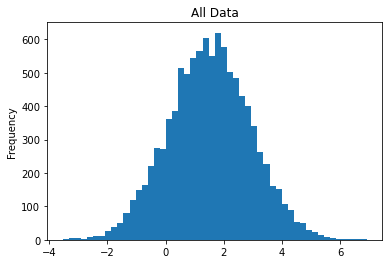

In [3]:
T=10000
x=1.5+rndn(T)
e=rndn(T)
y=x+e
data=pd.DataFrame(np.concatenate([y,x],axis=1),columns=['y','x'])

s=data['y']>0
t=data['y']<=0
data['y'].plot(kind='hist',bins=50,title='All Data') #Normal

<AxesSubplot:title={'center':'Truncated Data'}, ylabel='Frequency'>

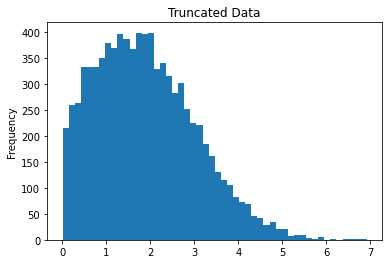

In [4]:
data_truncated=data[s] #A truncated Normal
data_truncated['y'].plot(kind='hist',bins=50,title='Truncated Data') #Normal

In [5]:
data_censored=data.copy()
data_censored['y'][t]=0  #A censored normal
data_censored['y'].plot(kind='hist',bins=50,title='Censored Data') #Normal

<AxesSubplot:title={'center':'Censored Data'}, ylabel='Frequency'>

<AxesSubplot:title={'center':'Censored Data'}, xlabel='x', ylabel='y'>

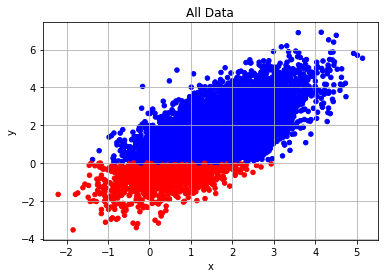

In [6]:
#The censored data
c=data.copy()['y']
s=data['y']<0
c[s]='red'
c[~s]='blue'
#data
data.plot(kind='scatter',x='x',y='y',color=c,grid=True,title='All Data')
data_truncated.plot(kind='scatter',x='x',y='y',grid=True,title='Truncated Data')
data_censored.plot(kind='scatter',x='x',y='y',color=c,grid=True,title='Censored Data')

In [7]:
#Truncation. e.g People only take jobs with a positive wage and we only observe the wages of those working
#Censoring.  e.g. People only take jobs with a positive wage but we observe the wages of those both working and not working

<AxesSubplot:xlabel='x', ylabel='y'>

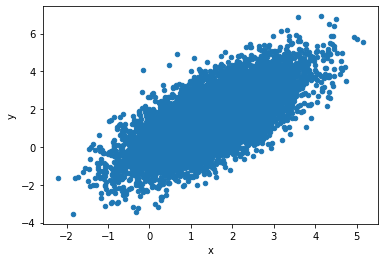

In [8]:
data.plot(kind='scatter',y='y',x='x')

In [9]:
mod=ols('y~x',data=data).fit()
print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.497
Model:                            OLS   Adj. R-squared:                  0.497
Method:                 Least Squares   F-statistic:                     9873.
Date:                Sat, 07 Jan 2023   Prob (F-statistic):               0.00
Time:                        09:24:07   Log-Likelihood:                -14144.
No. Observations:               10000   AIC:                         2.829e+04
Df Residuals:                    9998   BIC:                         2.831e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0042      0.018     -0.230      0.8

In [10]:
mod=ols('y~x',data=data_truncated).fit()
print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.385
Model:                            OLS   Adj. R-squared:                  0.384
Method:                 Least Squares   F-statistic:                     5362.
Date:                Sat, 07 Jan 2023   Prob (F-statistic):               0.00
Time:                        09:24:07   Log-Likelihood:                -11163.
No. Observations:                8585   AIC:                         2.233e+04
Df Residuals:                    8583   BIC:                         2.234e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5486      0.021     26.678      0.0

In [11]:
mod=ols('y~x',data=data_censored).fit()
print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.471
Model:                            OLS   Adj. R-squared:                  0.471
Method:                 Least Squares   F-statistic:                     8913.
Date:                Sat, 07 Jan 2023   Prob (F-statistic):               0.00
Time:                        09:24:08   Log-Likelihood:                -13129.
No. Observations:               10000   AIC:                         2.626e+04
Df Residuals:                    9998   BIC:                         2.628e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3122      0.016     18.954      0.0

In [12]:
mod=tobit('y~x',data_censored).fit()
print(mod.summary())

Optimization terminated successfully.
         Current function value: 1.334667
         Iterations: 77
         Function evaluations: 146
                                tobit_ Results                                
Dep. Variable:                      0   Log-Likelihood:                -13347.
Model:                         tobit_   AIC:                         2.670e+04
Method:            Maximum Likelihood   BIC:                         2.671e+04
Date:                Sat, 07 Jan 2023                                         
Time:                        09:24:08                                         
No. Observations:               10000                                         
Df Residuals:                    9998                                         
Df Model:                           1                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------

In [13]:
mroz=woo.data('mroz')
woo.data('mroz',description=True)

name of dataset: mroz
no of variables: 22
no of observations: 753

+----------+---------------------------------+
| variable | label                           |
+----------+---------------------------------+
| inlf     | =1 if in lab frce, 1975         |
| hours    | hours worked, 1975              |
| kidslt6  | # kids < 6 years                |
| kidsge6  | # kids 6-18                     |
| age      | woman's age in yrs              |
| educ     | years of schooling              |
| wage     | est. wage from earn, hrs        |
| repwage  | rep. wage at interview in 1976  |
| hushrs   | hours worked by husband, 1975   |
| husage   | husband's age                   |
| huseduc  | husband's years of schooling    |
| huswage  | husband's hourly wage, 1975     |
| faminc   | family income, 1975             |
| mtr      | fed. marg. tax rte facing woman |
| motheduc | mother's years of schooling     |
| fatheduc | father's years of schooling     |
| unem     | unem. rate in county of res

In [14]:
formula='hours~nwifeinc+exper+expersq+age+kidslt6+kidsge6+educ'
mod0=ols(formula,mroz).fit()
mod1=tobit(formula,mroz).fit()
print(mod0.summary())
print(mod1.summary())

Optimization terminated successfully.
         Current function value: 5.071839
         Iterations: 4432
         Function evaluations: 6355
                            OLS Regression Results                            
Dep. Variable:                  hours   R-squared:                       0.266
Model:                            OLS   Adj. R-squared:                  0.259
Method:                 Least Squares   F-statistic:                     38.50
Date:                Sat, 07 Jan 2023   Prob (F-statistic):           3.42e-46
Time:                        09:24:10   Log-Likelihood:                -6049.5
No. Observations:                 753   AIC:                         1.212e+04
Df Residuals:                     745   BIC:                         1.215e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025  

In [15]:
#The marginal effects at the mean can be be calculated as

tobitmeffects(mod1)

ME         SE
nwifeinc   -5.326443   2.694634
exper      79.504232  10.441927
expersq    -1.126509   0.324909
age       -32.876920   4.483011
kidslt6  -540.256840  67.607858
kidsge6    -9.800536  23.350933
educ       48.734094  13.042743